In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from kneed import KneeLocator

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

In [3]:
# 18
df1 = pd.read_excel('https://github.com/robertasgabrys/DSO559/blob/main/grocery.xlsx?raw=true')
df1.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents/Paper,Delicatessen,Grocery
0,HotelRetaurantCafe,Lisbon,25203,11487,5065,284,6854,9490
1,HotelRetaurantCafe,Lisbon,2806,10765,1374,5828,2388,15538
2,HotelRetaurantCafe,Lisbon,5396,7503,91,4167,239,10646
3,HotelRetaurantCafe,Lisbon,6202,7775,1183,3143,1970,10817
4,HotelRetaurantCafe,Lisbon,10379,17972,4686,1547,3265,4748


In [4]:
df= df1[['Fresh', 'Milk', 'Frozen', 'Detergents/Paper','Delicatessen', 'Grocery']].copy()

In [5]:
scaled_features = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [6]:
# 4
K = 15
sse = [KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).inertia_ for k in range(1,K+1)]
KneeLocator(range(1,K+1),sse,curve='convex',direction='decreasing').elbow

5

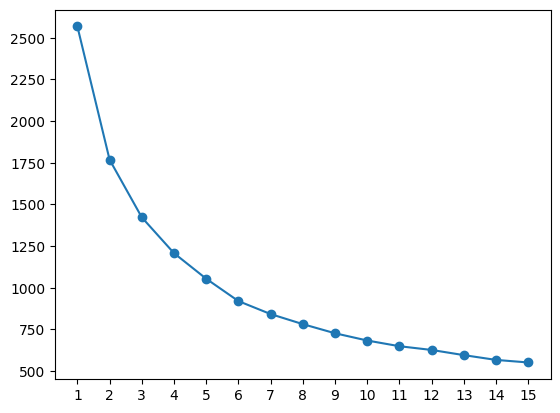

In [7]:
plt.plot(range(1,K+1),sse,marker='o')
plt.xticks(range(1,K+1))
plt.show()

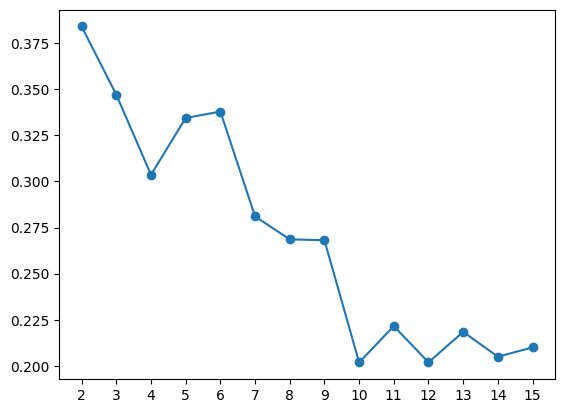

In [8]:
scs = [silhouette_score(scaled_features,\
                  KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).labels_) for k in range(2,K+1)]
plt.plot(range(2,K+1),scs,marker='o')
plt.xticks(range(2,K+1))
plt.show()

In [9]:
# 19
k = 5
df1['K=5'] = KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).labels_
df1['K=5'].value_counts()

4    225
2     75
0     61
1     50
3     17
Name: K=5, dtype: int64

In [10]:
# Q20
pd.crosstab(index = df1['K=5'], columns = df1['Channel']) 

Channel,HotelRetaurantCafe,Retail
K=5,,
0,31,30
1,47,3
2,7,68
3,0,17
4,207,18


In [11]:
# 21
df1.groupby(['K=5']).mean().sort_values(by = ['Milk'], ascending=False)

<ipython-input-11-313e54c4deda>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['K=5']).mean().sort_values(by = ['Milk'], ascending=False)


,Fresh,Milk,Frozen,Detergents/Paper,Delicatessen,Grocery
K=5,,,,,,
3,6963.882353,19881.882353,1942.647059,14292.647059,2844.529412,29165.352941
2,4505.066667,8934.053333,1289.773333,6880.213333,1037.866667,15394.426667
0,15567.459016,7431.147541,2302.032787,2169.163934,3072.360656,8036.688525
1,25829.380000,3713.220000,9610.220000,569.600000,1515.460000,4396.740000
4,9661.368889,2443.920000,1874.582222,807.008889,701.640000,3224.662222


In [12]:
# 22
df1.groupby(['K=5']).mean().sort_values(by = ['Delicatessen'], ascending=False)

<ipython-input-12-2db2a7ca8590>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['K=5']).mean().sort_values(by = ['Delicatessen'], ascending=False)


,Fresh,Milk,Frozen,Detergents/Paper,Delicatessen,Grocery
K=5,,,,,,
0,15567.459016,7431.147541,2302.032787,2169.163934,3072.360656,8036.688525
3,6963.882353,19881.882353,1942.647059,14292.647059,2844.529412,29165.352941
1,25829.380000,3713.220000,9610.220000,569.600000,1515.460000,4396.740000
2,4505.066667,8934.053333,1289.773333,6880.213333,1037.866667,15394.426667
4,9661.368889,2443.920000,1874.582222,807.008889,701.640000,3224.662222


In [13]:
# 23
df1['K=5'].value_counts()

4    225
2     75
0     61
1     50
3     17
Name: K=5, dtype: int64

In [14]:
df1.groupby(['K=5']).mean()

<ipython-input-14-26a33b1f7b83>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['K=5']).mean()


,Fresh,Milk,Frozen,Detergents/Paper,Delicatessen,Grocery
K=5,,,,,,
0,15567.459016,7431.147541,2302.032787,2169.163934,3072.360656,8036.688525
1,25829.380000,3713.220000,9610.220000,569.600000,1515.460000,4396.740000
2,4505.066667,8934.053333,1289.773333,6880.213333,1037.866667,15394.426667
3,6963.882353,19881.882353,1942.647059,14292.647059,2844.529412,29165.352941
4,9661.368889,2443.920000,1874.582222,807.008889,701.640000,3224.662222


In [15]:
# 24
k = 6
df1['K=6'] = KMeans(n_clusters=k,init = 'random', n_init = 10,random_state=1).fit(scaled_features).labels_

In [16]:
pd.crosstab(index = df1['K=5'], columns = df1['K=6']) 

K=6,0,1,2,3,4,5
K=5,,,,,,
0,10,10,33,0,7,1
1,0,13,0,0,0,37
2,74,0,0,1,0,0
3,0,0,0,17,0,0
4,5,16,0,0,200,4


In [17]:
(5+16+4)/225

0.1111111111111111

In [18]:
13/50

0.26